<a href="https://colab.research.google.com/github/imuneeb33/Image-Reconstrution-through-Autoencoder/blob/main/ANN_Quiz_2%2001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from keras.optimizers import Adam
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

In [3]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
np.random.seed(42)

In [5]:
# Normalize the input data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


In [6]:
# reshaping for convolutional layers
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [7]:
# Input layer
input_img = Input(shape=(28, 28, 1))

In [8]:
# Encoding layers
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [9]:
# Decoding layers
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [10]:
# Autoencoder model
autoencoder = Model(input_img, decoded)

In [14]:
optimizer = Adam(learning_rate=0.01)
# model.compile(optimizer=optimizer, loss='binary_crossentropy')

In [12]:
# Compile the model
autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# Train the model
autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test)) 

Epoch 1/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0890 - accuracy: 0.8138 - val_loss: 0.0878 - val_accuracy: 0.8129
Epoch 2/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0889 - accuracy: 0.8138 - val_loss: 0.0880 - val_accuracy: 0.8130
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0890 - accuracy: 0.8138 - val_loss: 0.0883 - val_accuracy: 0.8131
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0889 - accuracy: 0.8138 - val_loss: 0.0878 - val_accuracy: 0.8128
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0888 - accuracy: 0.8138 - val_loss: 0.0876 - val_accuracy: 0.8129
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0888 - accuracy: 0.8138 - val_loss: 0.0878 - val_accuracy: 0.8128
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0888 - accuracy: 0.8138 - val_loss: 0.0876 - val_accuracy: 0.8130

KeyboardInterrupt: ignored

In [ ]:
history = model.fit(x_train, x_train, epochs=100, shuffle=True, validation_data=(x_test, x_test))


# Plot the training loss and accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [13]:
# Evaluation
score = autoencoder.evaluate(x_test, x_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.6899259686470032
Test accuracy: 0.6864759922027588


In [14]:
# Use the trained autoencoder to encode the test images
encoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 5s 14ms/step


313/313 [==============================] - 5s 14ms/step


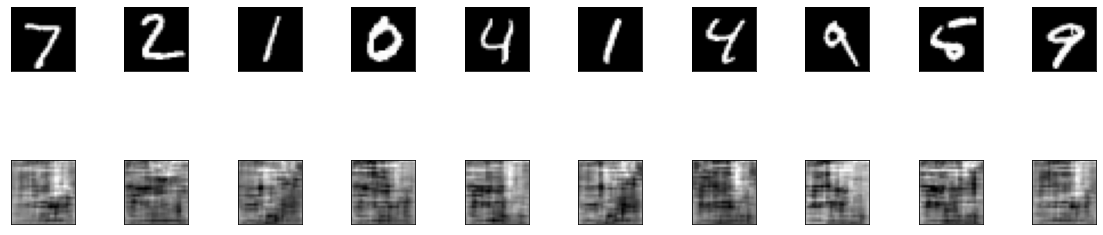

In [22]:
encoded_imgs = autoencoder.predict(x_test)
reconstructed_imgs = autoencoder.predict(encoded_imgs)


# Use Matplotlib to plot the original images, encoded images, and reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
   # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Encoded images
    encoded_imgs = encoded_imgs.reshape((len(encoded_imgs), 
    np.prod(encoded_imgs.shape[1:])))

    #ax = plt.subplot(3, n, i + 1 + n)
    #plt.imshow(encoded_imgs[i].reshape(28, 28))
    #plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(autoencoder.predict(x_test)[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

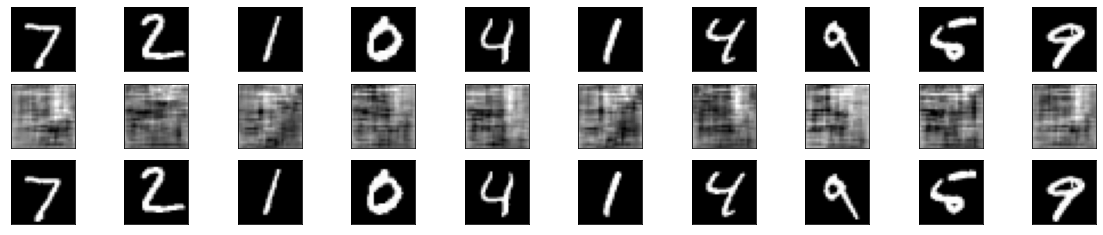

In [23]:
import matplotlib.pyplot as plt

# Use Matplotlib to plot the original images, encoded images, and reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Encoded images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax.set_xlabel('Original Images')
    ax.set_ylabel('Encoded Images')

    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')




In [19]:
print(encoded_imgs.shape)


(10000, 28, 28, 1)
